In [92]:
import keras
import numpy as np

In [93]:
model_path = 'models/batch30-epochs200-lstm32'
model = keras.models.load_model(model_path)

In [94]:
from data_loader import Data
data = Data()

data.features[np.isnan(data.features)] = -1
data.train.features[np.isnan(data.train.features)] = -1
data.test.features[np.isnan(data.test.features)] = -1

In [95]:
model.evaluate(x=data.test.features, y=data.test.vasopressin.reshape(-1, data.maxlen, 1))

414/414 [==============================] - 2s 6ms/step


0.14433229536465977

In [96]:
preds = model.predict(data.test.features[:100])

In [98]:
import matplotlib.pyplot as plt
plt.style.use([{
    "figure.figsize":(12,9),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn'])

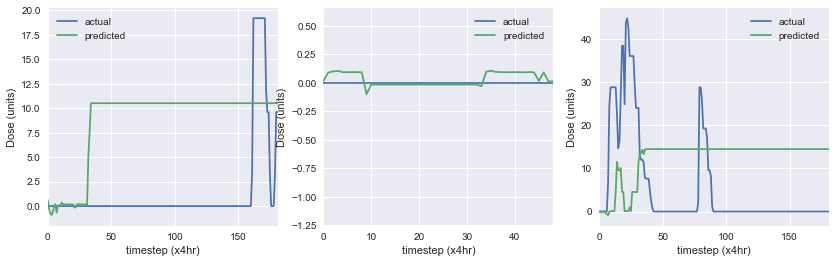

In [109]:
f, ax = plt.subplots(1, 3, figsize=(14, 4))

for n, i in enumerate([17, 18, 32]):
    d = data.vasopressin[i]
    x = range(len(d))
    ax = plt.subplot(1, 3, n + 1)
    ax.plot(d, label='actual')
    ax.plot(preds[i][:len(d)], label='predicted')
    ax.set_xlabel('timestep (x4hr)')
    ax.set_ylabel('Dose (units)')
    plt.xlim([0, np.array(np.where(d==-1)).min() -6])
    ax.legend()

f.savefig('figures/predicted_vasopressin.png', dpi=200, )

In [ ]:
np.array(np.where(d==-1)).min()